# Student Performance Analysis with Machine Learning

# importing the libraries

In [31]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import warnings

# read the dataset

In [32]:
data = pd.read_csv("C:\\Users\\USER\Documents\\Project\\StudentsPerformance.csv")

# getting the shape of the data
print(data.shape)

(1000, 8)


# To look at the first 5 records in the data set

In [33]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Descriptive Statistics

In [34]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [36]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# number of unique items present in the categorical column

In [37]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

# checking the percentage of missing data in each columns present in the data 

In [38]:
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


# To see comparison of all other attributes with respect to Math Marks

# checking the Effect of Lunch on Student’s Performnce

In [39]:
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

# checking for the Effect of Test Preparation Course on Scores

In [40]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

# Data Visualizations

## Visualizing the number of male and female in the data set

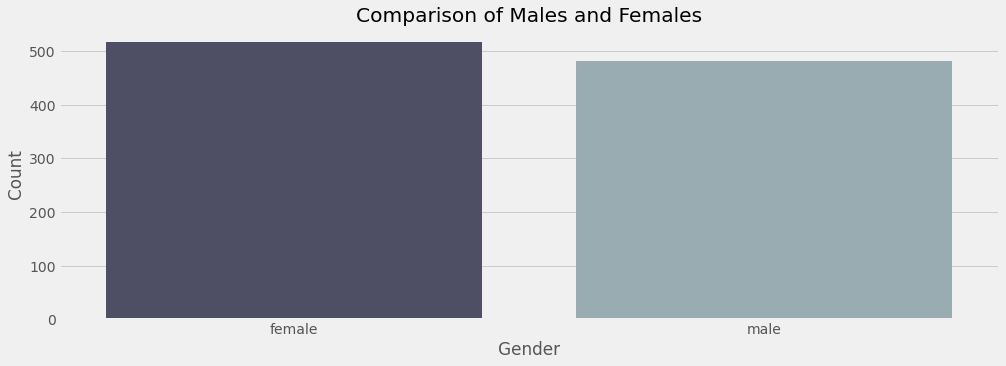

In [41]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualizing the different groups in the data set

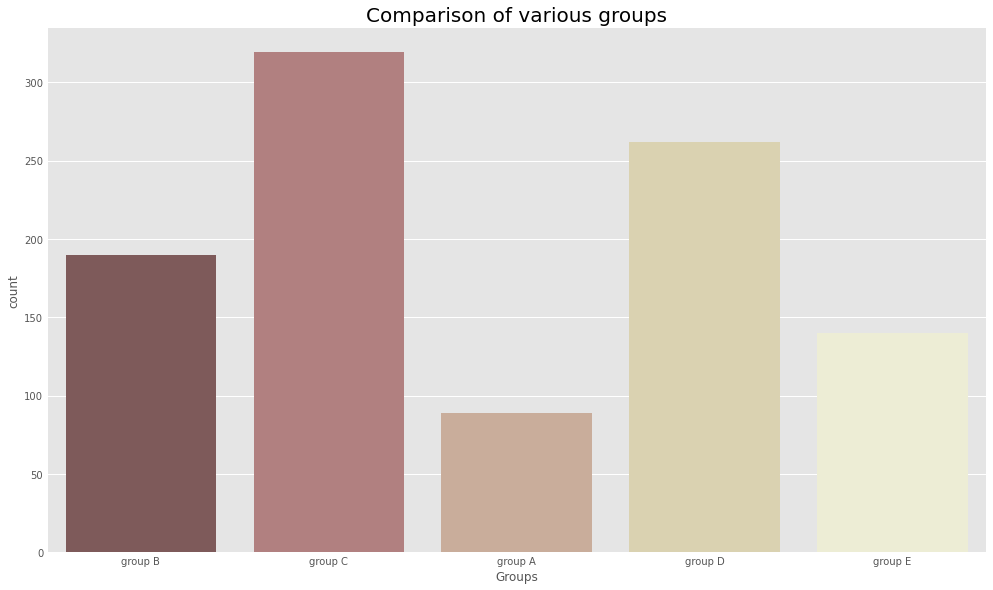

In [42]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

# Visualizing the different parental education levels

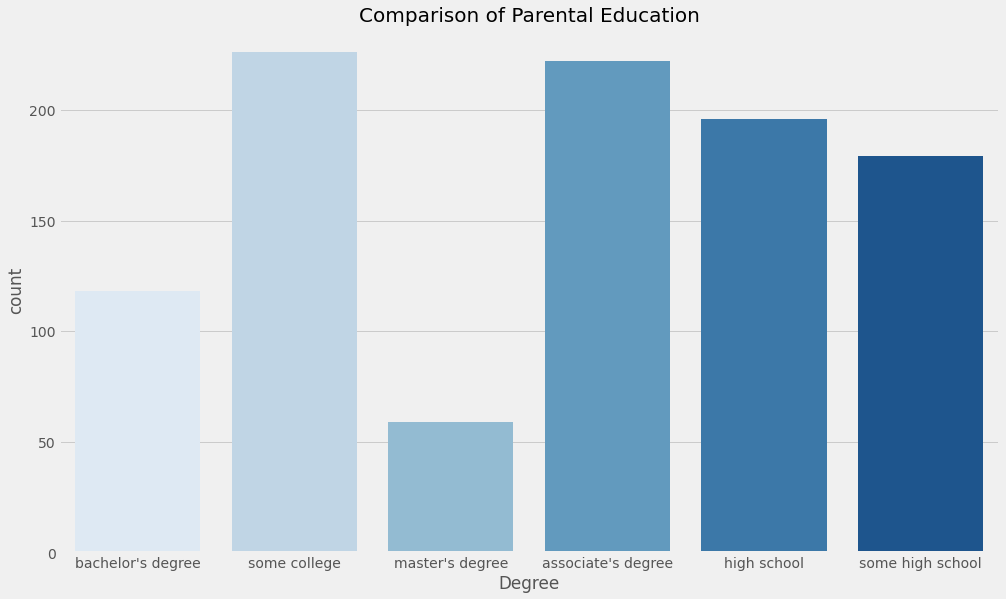

In [43]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

# Visualizing Maths score

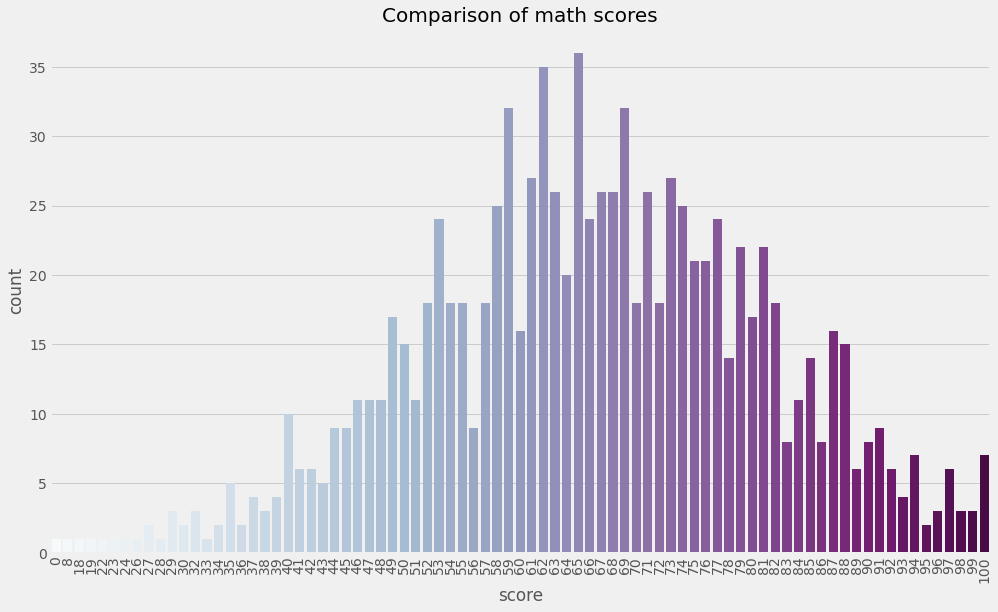

In [44]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

# Computing the total score for each student

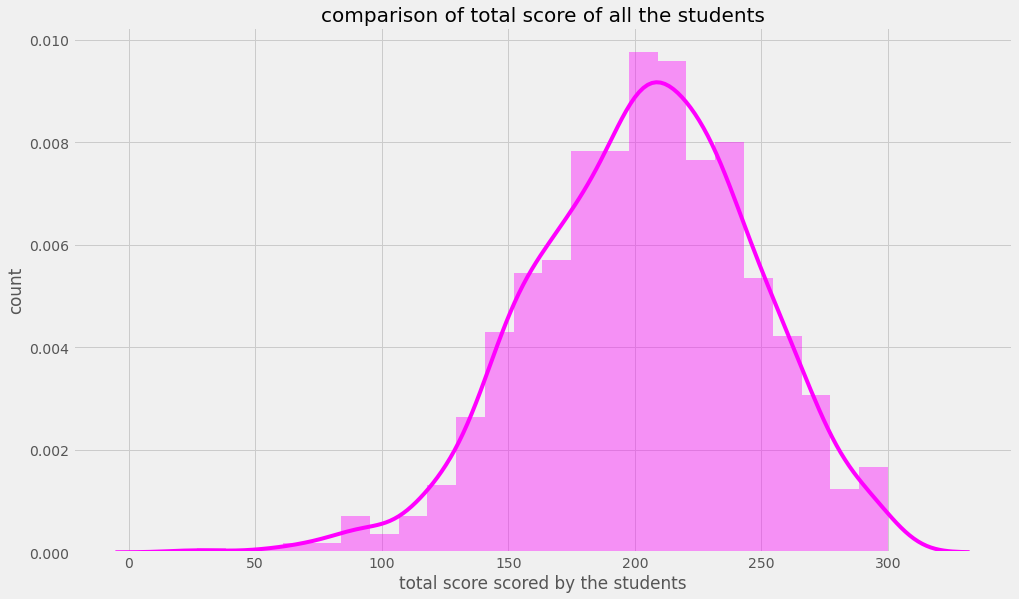

In [45]:

warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

# Computing percentage for each of the students

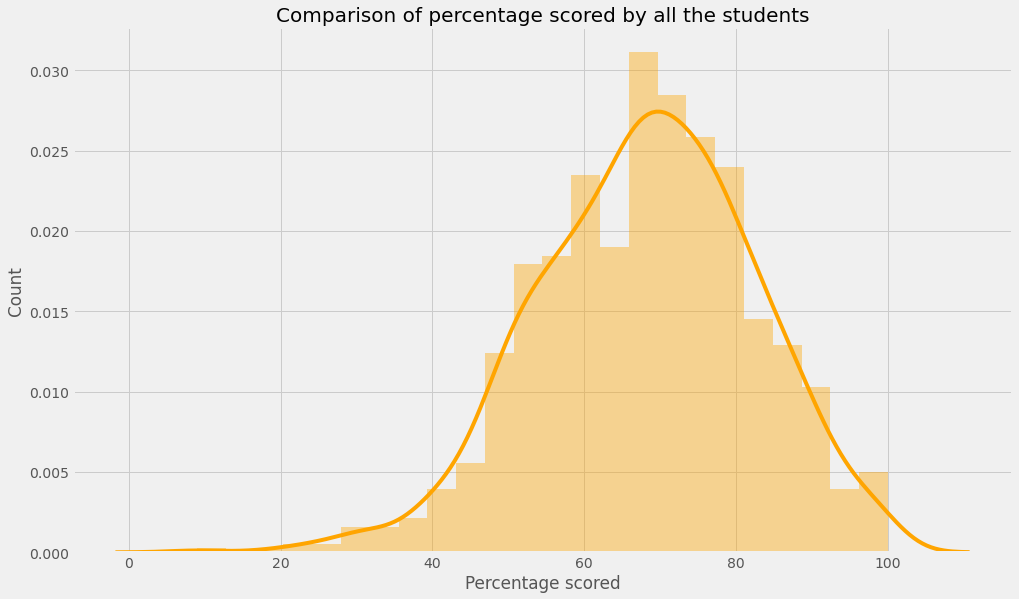

In [46]:
# importing math library to use ceil
from math import * 
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

In [47]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,83.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,50.0
4,male,group C,some college,standard,none,76,78,75,229,77.0


# Label Encoding

In [57]:
cat =data.iloc[:, :5]

In [58]:
for col in cat.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].values)

In [59]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage
0,0,1,1,1,1,72,72,74,218,73.0
1,0,2,4,1,0,69,90,88,247,83.0
2,0,1,3,1,1,90,95,93,278,93.0
3,1,0,0,0,1,47,57,44,148,50.0
4,1,2,4,1,1,76,78,75,229,77.0


# Splitting the Dataset

In [60]:
X = data.drop('percentage', axis=1)
y = data.percentage

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalization

In [62]:
sc = StandardScaler()

In [63]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [64]:
from sklearn.linear_model import  LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
r2_score(y_test,y_pred)

0.9104149066416283